In [5]:
#!/usr/bin/env python3
"""
CiNii ArticleのAPIをCSVに
"""

import urllib3
import urllib.parse
import certifi
import pandas as pd
import csv
import sys
import json
import time

#APPID = "xxxxx" # APPIDはCiNiiで取得してセット
APPID = "xxxxx"
keyword2 = "新井素子"
keyword = urllib.parse.quote(keyword2)
count = 50

req_url = 'https://ci.nii.ac.jp/books/opensearch/search?format=json'
req_url = req_url + "&appid=" + APPID
http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())

def req(keyword, start):
   req_url2 = req_url + "&q=" + keyword + "&start=" + str(start) + "&count=" + str(count)
   print(req_url2)
   response = http.request('GET', req_url2)
   json_data = response.data.decode('utf-8')
   time.sleep(0.5)
   return json_data

data_dict1 = json.loads(req(keyword,1))
totalResults = data_dict1["@graph"][0]["opensearch:totalResults"] # 総件数
print("totalResults: ",totalResults)

data_dict = pd.DataFrame()

num = 1
while True:
    json_data2 = req(keyword,num)
    try:
        data_dict = data_dict.append( pd.read_json(json.dumps(json.loads(json_data2)["@graph"][0]["items"])) ,sort="true")
    except Exception:
        pass
    # 
    num = num + count
    if num > int(totalResults) :
        break



https://ci.nii.ac.jp/books/opensearch/search?format=json&appid=CiNii09-89ef94917d5946d2a0dae832519f760b&q=%E6%96%B0%E4%BA%95%E7%B4%A0%E5%AD%90&start=1&count=50
totalResults:  136
https://ci.nii.ac.jp/books/opensearch/search?format=json&appid=CiNii09-89ef94917d5946d2a0dae832519f760b&q=%E6%96%B0%E4%BA%95%E7%B4%A0%E5%AD%90&start=1&count=50
https://ci.nii.ac.jp/books/opensearch/search?format=json&appid=CiNii09-89ef94917d5946d2a0dae832519f760b&q=%E6%96%B0%E4%BA%95%E7%B4%A0%E5%AD%90&start=51&count=50
https://ci.nii.ac.jp/books/opensearch/search?format=json&appid=CiNii09-89ef94917d5946d2a0dae832519f760b&q=%E6%96%B0%E4%BA%95%E7%B4%A0%E5%AD%90&start=101&count=50


In [37]:
data_dict.tail()

<class 'pandas.core.frame.DataFrame'>


,@id,@type,cinii:ownerCount,dc:creator,dc:date,dc:publisher,dcterms:hasPart,dcterms:isPartOf,link,prism:publicationDate,rdfs:seeAlso,title
45,http://ci.nii.ac.jp/ncid/BA83194917,item,1,新井素子著,2001,[徳間書店],[{'@id': 'urn:isbn:4199050779'}],[{'@id': 'http://ci.nii.ac.jp/ncid/BA51589551'...,{'@id': 'http://ci.nii.ac.jp/ncid/BA83194917'},2001,{'@id': 'http://ci.nii.ac.jp/ncid/BA83194917.j...,くますけと一緒に
46,http://ci.nii.ac.jp/ncid/BA74166659,item,6,新井素子 [著],2005,[角川書店],[{'@id': 'urn:isbn:404160012X'}],[{'@id': 'http://ci.nii.ac.jp/ncid/BN0007882X'...,{'@id': 'http://ci.nii.ac.jp/ncid/BA74166659'},2005,{'@id': 'http://ci.nii.ac.jp/ncid/BA74166659.j...,ハッピー・バースディ
47,http://ci.nii.ac.jp/ncid/BA68841178,item,7,新井素子著,1986,[集英社],[{'@id': 'urn:isbn:4086108747'}],[{'@id': 'http://ci.nii.ac.jp/ncid/BN01277945'...,{'@id': 'http://ci.nii.ac.jp/ncid/BA68841178'},1986,{'@id': 'http://ci.nii.ac.jp/ncid/BA68841178.j...,逆恨みのネメシス : ロマンチックSF
48,http://ci.nii.ac.jp/ncid/BA68840517,item,6,新井素子著,1983,[集英社],NaN,[{'@id': 'http://ci.nii.ac.jp/ncid/BN01277945'...,{'@id': 'http://ci.nii.ac.jp/ncid/BA68840517'},1983,{'@id': 'http://ci.nii.ac.jp/ncid/BA68840517.j...,カレンダー・ガール
49,http://ci.nii.ac.jp/ncid/BA68838333,item,6,新井素子著,1982,[集英社],NaN,[{'@id': 'http://ci.nii.ac.jp/ncid/BN01277945'...,{'@id': 'http://ci.nii.ac.jp/ncid/BA68838333'},1982,{'@id': 'http://ci.nii.ac.jp/ncid/BA68838333.j...,通りすがりのレイディ


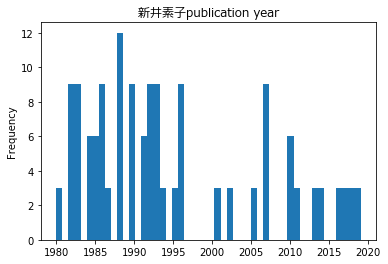

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
title = keyword2 + 'publication year'
# 出版年のヒストグラム
histg = data_dict['dc:date'].plot.hist(bins=50)
histg.set_title(title, fontname="Meiryo")
histg
histg.figure.savefig("chart.jpg")

dc:publisher  CBS・ソニー出版  中央公論新社  大陸書房  広済堂出版  廣済堂出版  徳間書店  文化出版局  新書館  新潮社  \
dc:date                                                                      
1980                  0       0     0      0      0     0      0    0    0   
1982                  3       0     0      0      0     3      0    0    0   
1983                  0       0     0      0      0     0      0    0    0   
1984                  0       0     0      0      0     0      3    0    0   
1985                  0       0     0      0      0     0      0    3    0   
1986                  0       0     0      0      0     3      0    0    0   
1987                  0       0     0      0      0     3      0    0    0   
1988                  0       0     3      0      0     0      0    0    0   
1990                  0       0     0      0      0     0      0    0    0   
1991                  0       0     3      0      0     0      0    0    0   
1992                  0       0     0      0      0     3      0

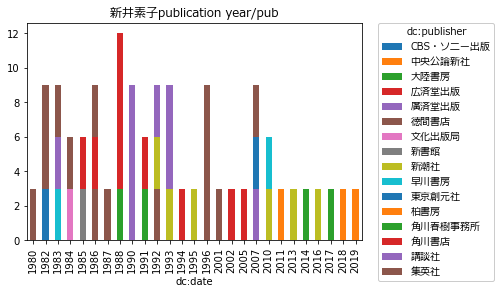

In [16]:
%matplotlib inline
# normalize='index'で行ごとの割合で集計される
data_dict['dc:creator'] = data_dict['dc:creator'].str.replace('\[', '222') # これは置換できた
data_dict['dc:publisher'] = data_dict['dc:publisher'].apply(''.join) # やっとできた[]をとる
# pd.crosstab(index=data_dict.loc[:,'dc:creator'],columns=data_dict.loc[:,'dc:date'])
cros = pd.crosstab(data_dict.loc[:,'dc:date'],data_dict.loc[:,'dc:publisher'])
print(cros)
# stacked=Trueで積み上げ機能オン
crosg = cros.plot.bar(stacked=True)
title = keyword2 + 'publication year/pub'
crosg.set_title(title, fontname="Meiryo")
legend = crosg.legend(framealpha=1.0, prop={"family":"Meiryo"},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
# (bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
legend.set_title('dc:publisher', prop={"family":"Meiryo"})
# crosg.legend(["凡例"], prop={"family":"Meiryo"})
crosg

In [ ]:
# CSV出力
data_dict.to_csv('cib_data.csv', encoding='utf-8_sig', quoting=csv.QUOTE_ALL, index=False )